# Bucksort Algorithm


## Problem Statement


Apply **Bucksort (Hierarchical Agglomerative Clustering (HAC) + K-Means Clustering) Algorithm** on the **Iris dataset** using the **complete linkage** method and a **bottom-up (agglomerative)** approach, considering only **sepal length** and **petal width** as features, and divide the data into **threetwo clusters**.


### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import matplotlib.patches as patches
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

### Load the Iris Dataset


In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
species = np.array(iris.target_names)[y]

In [3]:
print("Features: ", feature_names)
print("Target: ", target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target:  ['setosa' 'versicolor' 'virginica']


In [4]:
df = pd.DataFrame(X, columns=feature_names)
species_map = {i: name for i, name in enumerate(iris.target_names)}
df["species"] = [species_map[label] for label in y]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Plotting


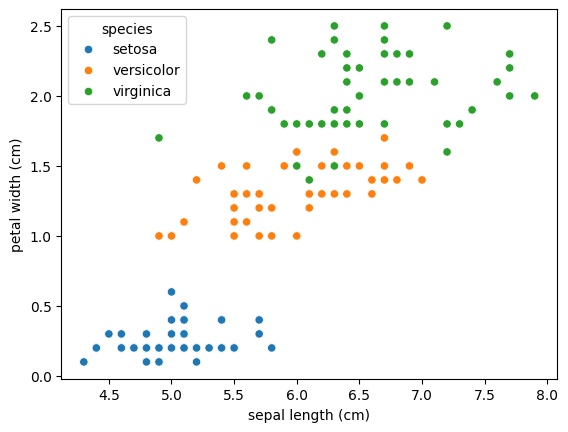

In [5]:
sns.scatterplot(x="sepal length (cm)", y="petal width (cm)", data=df, hue="species")
plt.show()

### Standardizing the data


In [6]:
scaler = StandardScaler()
X = iris.data[:, [0, 3]]
X_scaled = scaler.fit_transform(X)

### Perform Hierarchical Agglomerative Clustering with complete linkage


In [7]:
hac = AgglomerativeClustering(n_clusters=2, linkage="complete", metric="cosine")
hac_labels = hac.fit_predict(X_scaled)

In [8]:
Z = linkage(X_scaled, method="complete", metric="cosine")

### Visualize Clusters


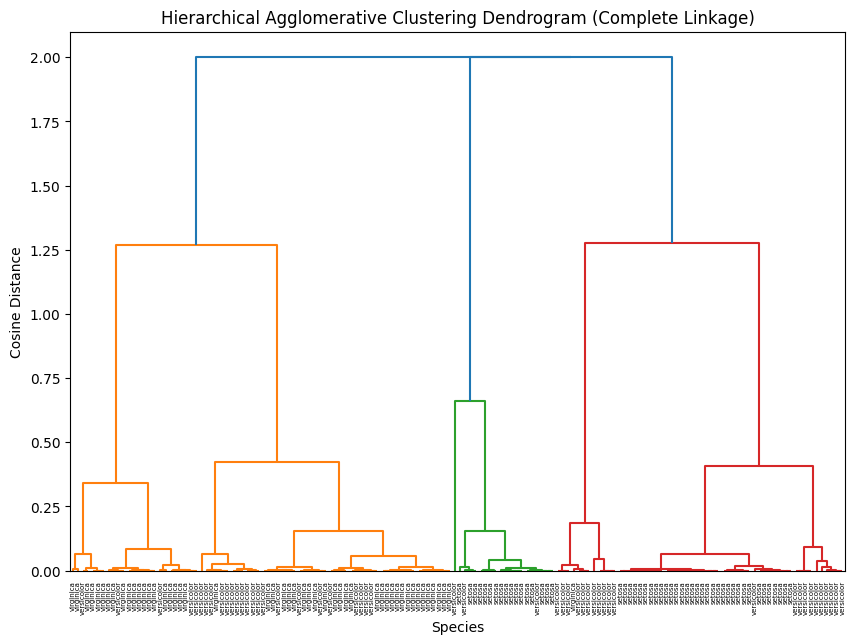

In [9]:
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=iris.target_names[y], leaf_rotation=90)
plt.title("Hierarchical Agglomerative Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Species")
plt.ylabel("Cosine Distance")
plt.show()

### Compute centroids from HAC sample clustering


In [10]:
centroids = np.array(
    [X_scaled[hac_labels == k].mean(axis=0) for k in np.unique(hac_labels)]
)

### Implement K-Means Clustering


In [11]:
kmeans = KMeans(n_clusters=2, init=centroids, n_init=1, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

### Run K-Means initialized with those centroids


In [12]:
kmeans_centers = kmeans.cluster_centers_
print(kmeans_centers)

[[-0.81828702 -0.83454805]
 [ 0.81828702  0.83454805]]


### Plot clusters and convex hulls


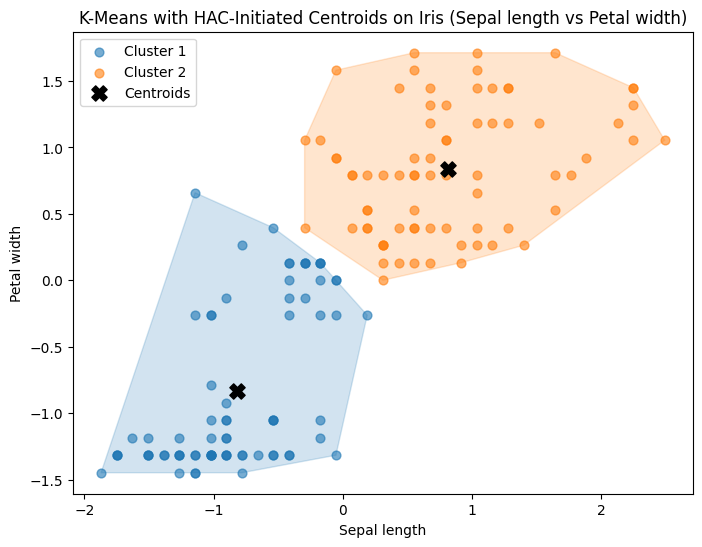

In [13]:
plt.figure(figsize=(8, 6))

colors = ["tab:blue", "tab:orange"]

for i, color in enumerate(colors):
    points = X_scaled[kmeans_labels == i]
    plt.scatter(
        points[:, 0], points[:, 1], s=40, c=color, label=f"Cluster {i+1}", alpha=0.6
    )

    # Convex hull or circle fallback
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        plt.fill(hull_points[:, 0], hull_points[:, 1], color=color, alpha=0.2)
    else:
        center = points.mean(axis=0)
        circle = patches.Circle(center, 0.2, color=color, alpha=0.2)
        plt.gca().add_patch(circle)

plt.scatter(
    kmeans_centers[:, 0],
    kmeans_centers[:, 1],
    c="black",
    s=120,
    marker="X",
    label="Centroids",
)

plt.title("K-Means with HAC-Initiated Centroids on Iris (Sepal length vs Petal width)")
plt.xlabel("Sepal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()